In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from pandas_profiling import ProfileReport
from sklearn.linear_model import Ridge, Lasso , RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle
%matplotlib inline


Matplotlib is building the font cache; this may take a moment.


In [4]:
df = pd.read_csv('Admission_Prediction.csv')
df.head()

Serial No.  GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0           1      337.0        118.0                4.0  4.5  4.5  9.65   
1           2      324.0        107.0                4.0  4.0  4.5  8.87   
2           3        NaN        104.0                3.0  3.0  3.5  8.00   
3           4      322.0        110.0                3.0  3.5  2.5  8.67   
4           5      314.0        103.0                2.0  2.0  3.0  8.21   

   Research  Chance of Admit  
0         1             0.92  
1         1             0.76  
2         1             0.72  
3         1             0.80  
4         0             0.65

In [12]:
pf = ProfileReport(df)
pf.to_notebook_iframe()

Render HTML: 100%|██████████| 1/1 [00:04<00:00,  4.72s/it]


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [6]:
df['GRE Score'].fillna(df['GRE Score'].mean(), inplace=True)
df['TOEFL Score'].fillna(df['TOEFL Score'].mean(), inplace=True)
df['University Rating'].fillna(df['University Rating'].mean(), inplace=True)
df.head(10)

Serial No.   GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  \
0           1  337.000000        118.0           4.000000  4.5  4.5  9.65   
1           2  324.000000        107.0           4.000000  4.0  4.5  8.87   
2           3  316.558763        104.0           3.000000  3.0  3.5  8.00   
3           4  322.000000        110.0           3.000000  3.5  2.5  8.67   
4           5  314.000000        103.0           2.000000  2.0  3.0  8.21   
5           6  330.000000        115.0           5.000000  4.5  3.0  9.34   
6           7  321.000000        109.0           3.121649  3.0  4.0  8.20   
7           8  308.000000        101.0           2.000000  3.0  4.0  7.90   
8           9  302.000000        102.0           1.000000  2.0  1.5  8.00   
9          10  323.000000        108.0           3.000000  3.5  3.0  8.60   

   Research  Chance of Admit  
0         1             0.92  
1         1             0.76  
2         1             0.72  
3         1             0.80  
4         0             0.65  
5         1             0.90  
6         1             0.75  
7         0             0.68  
8         0             0.50  
9         0             0.45

In [9]:
scaler = StandardScaler()
X = df.iloc[:, 1:-1]
X_norm = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_norm

GRE Score  TOEFL Score  University Rating       SOP       LOR  \
0    1.842741e+00     1.788542           0.778906  1.137360  1.098944   
1    6.708143e-01    -0.031058           0.778906  0.632315  1.098944   
2    5.124333e-15    -0.527313          -0.107877 -0.377773  0.017306   
3    4.905178e-01     0.465197          -0.107877  0.127271 -1.064332   
4   -2.306679e-01    -0.692731          -0.994659 -1.387862 -0.523513   
..            ...          ...                ...       ...       ...   
495  1.392000e+00     0.134360           1.665688  1.137360  0.558125   
496  1.842741e+00     1.623124           1.665688  1.642404  1.639763   
497  1.211704e+00     2.119379           1.665688  1.137360  1.639763   
498 -4.109644e-01    -0.692731           0.778906  0.632315  1.639763   
499  9.412590e-01     0.961451           0.778906  1.137360  1.098944   

         CGPA  Research  
0    1.776806  0.886405  
1    0.485859  0.886405  
2   -0.954043  0.886405  
3    0.154847  0.886405  
4   -0.606480 -1.128152  
..        ...       ...  
495  0.734118  0.886405  
496  2.140919  0.886405  
497  1.627851  0.886405  
498 -0.242367 -1.128152  
499  0.767220 -1.128152  

[500 rows x 7 columns]

In [10]:
pickle.dump(scaler.fit(X), open('scaler_model.pickle', 'wb'))


In [11]:
scaler_model = pickle.load(open('scaler_model.pickle', 'rb'))
scaler_model.var_**.5   


array([11.09284231,  6.04528354,  1.12767254,  0.99001212,  0.92452366,
        0.60420768,  0.49638695])

In [12]:
y = df.iloc[:, -1]
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit, Length: 500, dtype: float64

In [7]:
def calc_vif(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.to_numpy(), i) for i in range(X.shape[1])]
    return vif

In [9]:
calc_vif(X)

Features          VIF
0          GRE Score  1275.596985
1        TOEFL Score  1194.651453
2  University Rating    20.686567
3                SOP    34.449850
4                LOR    30.951315
5               CGPA   928.315950
6           Research     2.879356

In [28]:
calc_vif(X_norm)

Features       VIF
0          GRE Score  4.153268
1        TOEFL Score  3.792866
2  University Rating  2.508768
3                SOP  2.775750
4                LOR  2.037308
5               CGPA  4.651670
6           Research  1.459311

In [13]:
x_train, x_test, y_train, y_test = train_test_split(
    X_norm.to_numpy(), y, test_size=0.10, random_state=100)


In [14]:
reg = LinearRegression()
reg.fit(x_train, y_train)
reg.score(x_test, y_test)

0.8455601940647209

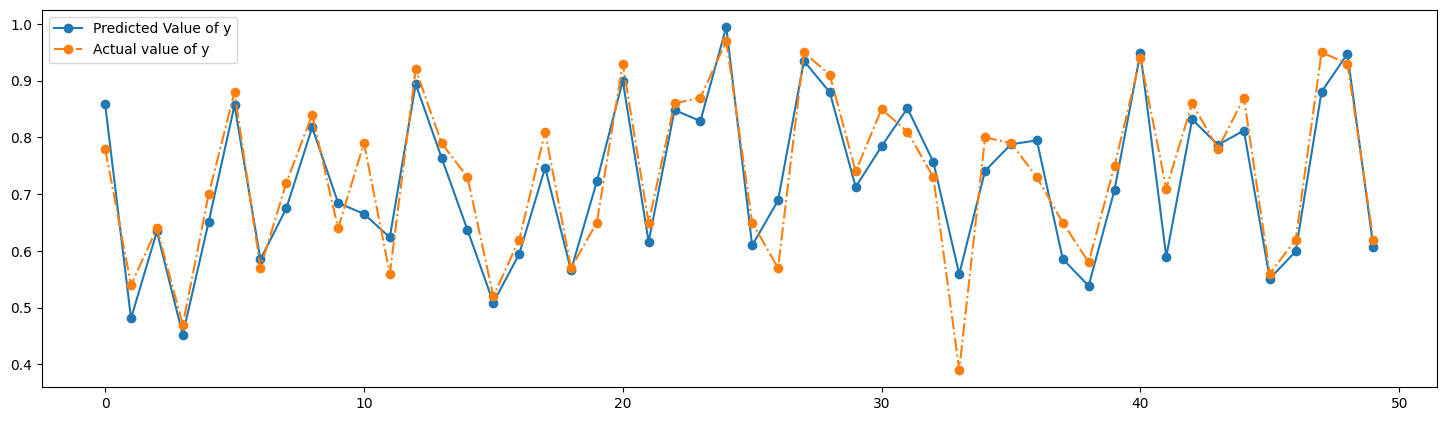

In [15]:
y_predicted = reg.predict(x_test)
plt.figure(figsize=(18, 5), dpi=100)
plt.plot(y_predicted, marker='o', label='Predicted Value of y')
plt.plot(y_test.to_numpy(), marker='o', linestyle='dashdot', label='Actual value of y')
plt.legend()

In [12]:
pickle.dump(reg, open('linear_regression_model.pickle','wb'))

In [13]:
lin_reg = pickle.load(open('linear_regression_model.pickle','rb'))